## Lecture-03 Gradient Descent and Dymanic Programming

In this week, we need complete following tasks:
+ Re-review the course online programming; 
+ Choose 1 - 2 books which you interested and keep reading; 
+ Answer the review questions
+ Prepare the basic requirement of our 1st project. 

### Part I Review the online programming. 

### Part 2: change loss function from $loss = \frac{1}{n}\sum{(y_i - \hat(y_i))^2}$ to $loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$, and using your mathmatical knowledge to get the right partial formual. Implemen the gradient descent code.

In [3]:
#重新计算损失函数与倒数
def loss2(y, y_hat): # to evaluate the performance 
    return sum(np.abs([(y_i - y_hat_i) for y_i, y_hat_i in zip(list(y), list(y_hat))]))/ len(list(y))
def partial_k(x, y, y_hat):
    n = len(y)

    gradient = 0
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        # 两种情况
        if( y_i-y_hat_i)>=0:
            gradient += (-1) * x_i
        else:
            gradient=+x_i

    
    return 1 / n * gradient


def partial_b(x, y, y_hat):
    n = len(y)

    gradient = 0
    
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        if y_i-y_hat_i>=0:
            gradient += (-1) 
        else:
            gradient=+1

    
    return 1 / n * gradient
def price(rm, k, b):
    """f(x) = k * x + b"""
    return k * rm + b 

In [9]:
from sklearn.datasets import load_boston
import random
import numpy as np
data = load_boston()
X, y = data['data'], data['target']
X_rm = X[:, 5]


#.3. Gradient Descent to get optimal k* and *b

trying_times = 100000

X, y = data['data'], data['target']

min_loss = float('inf') 

current_k = random.random() * 200 - 100
current_b = random.random() * 200 - 100

learning_rate = 1e-03


update_time = 0

for i in range(trying_times):
    
    price_by_k_and_b = [price(r, current_k, current_b) for r in X_rm]
    
    current_loss = loss2(y, price_by_k_and_b)
    

    if current_loss < min_loss: # performance became better
        min_loss = current_loss
        
        if i % 500 == 0: 
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i,current_k, current_b, min_loss))

    k_gradient = partial_k(X_rm, y, price_by_k_and_b)
    
    b_gradient = partial_b(X_rm, y, price_by_k_and_b)
    
    current_k = current_k + (-1 * k_gradient) * learning_rate

    current_b = current_b + (-1 * b_gradient) * learning_rate

When time is : 0, get best_k: 84.59558907812672 best_b: -25.53313025707334, and the loss is: 483.586411557492
When time is : 500, get best_k: 84.58963058010463 best_b: -25.534118399366662, and the loss is: 483.54797643363156
When time is : 1000, get best_k: 84.58367208208253 best_b: -25.535106541659985, and the loss is: 483.509541309772
When time is : 1500, get best_k: 84.57771358406043 best_b: -25.53609468395331, and the loss is: 483.4711061859118
When time is : 2000, get best_k: 84.57175508603834 best_b: -25.537082826246632, and the loss is: 483.4326710620516
When time is : 2500, get best_k: 84.56579658801624 best_b: -25.538070968539955, and the loss is: 483.39423593819174
When time is : 3000, get best_k: 84.55983808999414 best_b: -25.53905911083328, and the loss is: 483.3558008143318
When time is : 3500, get best_k: 84.55387959197205 best_b: -25.540047253126602, and the loss is: 483.31736569047223
When time is : 4000, get best_k: 84.54792109394995 best_b: -25.541035395419925, and th

When time is : 52500, get best_k: 83.96994678580663 best_b: -25.63688519787229, and the loss is: 479.5507235521958
When time is : 53000, get best_k: 83.96398828778453 best_b: -25.637873340165612, and the loss is: 479.5122884283365
When time is : 53500, get best_k: 83.95802978976243 best_b: -25.638861482458935, and the loss is: 479.473853304477
When time is : 54000, get best_k: 83.95207129174034 best_b: -25.63984962475226, and the loss is: 479.43541818061647
When time is : 54500, get best_k: 83.94611279371824 best_b: -25.640837767045582, and the loss is: 479.3969830567567
When time is : 55000, get best_k: 83.94015429569615 best_b: -25.641825909338905, and the loss is: 479.3585479328968
When time is : 55500, get best_k: 83.93419579767405 best_b: -25.64281405163223, and the loss is: 479.32011280903663
When time is : 56000, get best_k: 83.92823729965195 best_b: -25.643802193925552, and the loss is: 479.2816776851772
When time is : 56500, get best_k: 83.92227880162986 best_b: -25.6447903362

### Part 3: Finish the Solution Parse Part of Edit-Distance

In [11]:
#思考中
#@lru_cache(maxsize=2**10)
def edit_distance(string1, string2):
    
    if len(string1) == 0: return len(string2)
    if len(string2) == 0: return len(string1)
    
    tail_s1 = string1[-1]
    tail_s2 = string2[-1]
    
    candidates = [
        (edit_distance(string1[:-1], string2) + 1, 'DEL {}'.format(tail_s1)),  # string 1 delete tail
        (edit_distance(string1, string2[:-1]) + 1, 'ADD {}'.format(tail_s2)),  # string 1 add tail of string2
    ]
    
    if tail_s1 == tail_s2:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 0, '')
    else:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 1, 'SUB {} => {}'.format(tail_s1, tail_s2))

    candidates.append(both_forward)
    
    min_distance, operation = min(candidates, key=lambda x: x[0])
    
    solution[(string1, string2)] = operation 
    
    return min_distance


In [14]:
solution = {}
edit_distance('jary', 'jerry')

2

In [15]:
solution

{('j', 'j'): '',
 ('j', 'je'): 'ADD e',
 ('j', 'jer'): 'ADD r',
 ('j', 'jerr'): 'ADD r',
 ('j', 'jerry'): 'ADD y',
 ('ja', 'j'): 'DEL a',
 ('ja', 'je'): 'SUB a => e',
 ('ja', 'jer'): 'ADD r',
 ('ja', 'jerr'): 'ADD r',
 ('ja', 'jerry'): 'ADD y',
 ('jar', 'j'): 'DEL r',
 ('jar', 'je'): 'DEL r',
 ('jar', 'jer'): '',
 ('jar', 'jerr'): 'ADD r',
 ('jar', 'jerry'): 'ADD y',
 ('jary', 'j'): 'DEL y',
 ('jary', 'je'): 'DEL y',
 ('jary', 'jer'): 'DEL y',
 ('jary', 'jerr'): 'SUB y => r',
 ('jary', 'jerry'): ''}

In [24]:
def parse_solutions(solutions: dict, string1: str, string2: str) -> str:
    route = []
    def helper(solutions: dict, string1: str, string2: str) -> None:
        if not string1 and not string2: return
        operation = solutions[(string1, string2)]
        route.append('{k}: {v}'.format(k=(string1, string2), v=operation))
        if operation.startswith('SUB') or operation == '':
            helper(solutions, string1[:-1], string2[:-1])
        elif operation.startswith('ADD'):
            helper(solutions, string1, string2[:-1])
        elif operation.startswith('DEL'):
            helper(solutions, string1[:-1], string2)
    helper(solutions, string1, string2)
    route.reverse()
    return '=>'.join(route) 

In [25]:
parse_solutions(solution, 'jary', 'jerry')

"('j', 'j'): =>('ja', 'je'): SUB a => e=>('jar', 'jer'): =>('jar', 'jerr'): ADD r=>('jary', 'jerry'): "

### Part 4 Choose 1 - 2 books to keep reading: 

+ SICP, Structure and Interpretation of Computer Programming. 
+ Introduction to Algorithms 
+ Artificial Intelligence A Modern Approach (3rd Edition) 
+ Code Complete 2 
+ Programming Pearls 
+ Deep Learning
+ 黑客与画家
+ 数学之美
+ Fluent Python
+ Hands on Tensorflow
+ Conference: NIPS_ ICML_ ICLR_ ACL_ AAAI

> most books you may find in our github: https://github.com/Computing-Intelligence/References

## Part 5-1: review machine learning

1. Why do we use Derivative / Gredient to fit a target function?¶

Ans:沿着梯度的反方向，目标函数时下降的最快的

2. In the words 'Gredient Descent', what's the Gredient and what's the Descent?¶

Ans:梯度就是导数，descent means the value decrease by the direction of derivative


3. What's the advantages of the 3rd gradient descent method compared to the previous methods?

Ans:Ans:the effciency is high and almost every iteration can get the smaller loss

4. Using the simple words to describe: What's the machine leanring.¶

Ans:Ans:learn the formula or rules from data by machine itself

1. Why do we need dynamic programming? What's the difference of dynamic programming and previous talked `search` problme? 


2. Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the `right` answer based on inputs?

3. Can you catch up at least 3 problems which could solved by Dynamic Programming? 

4. Can you catch up at least 3 problems wich could sloved by Edit Distance? 

5. Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature. 

6. What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)

## Part 6 Preparation of Project-01

1. Using python Flask or Bottle to finish your first simple web app:
> https://bottlepy.org/

2. Learn what's the SQL, and try some simple SQL operations:
> https://www.w3schools.com/sql/sql_intro.asp

3. Learn what's the HTML ( *ONLY* need to know the basic things)
> https://getbootstrap.com/; https://www.w3schools.com/html/

### (Optinal) Finish the k-person-salesman problem:

In [4]:
import random
import matplotlib.pylab as plt

In [5]:
latitudes = [random.randint(-100, 100) for _ in range(20)]
longitude = [random.randint(-100, 100) for _ in range(20)]

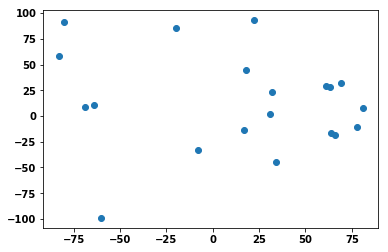

In [6]:
plt.scatter(latitudes, longitude)

给定一个初始点 𝑃, 已经 𝑘个车辆，如何从该点出发，经这 k 个车辆经过所以的点全部一次，而且所走过的路程最短?

例如：

In [8]:
chosen_p = (-50, 10)
chosen_p2 = (1, 30)
chosen_p3 = (99, 15)

In [9]:
import matplotlib.pyplot as plt

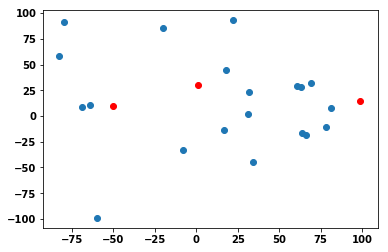

In [10]:
plt.scatter(latitudes, longitude)
plt.scatter([chosen_p[0]], [chosen_p[1]], color='r')
plt.scatter([chosen_p2[0]], [chosen_p2[1]], color='r')
plt.scatter([chosen_p3[0]], [chosen_p3[1]], color='r')

shuro